# Asia Pacific AllBox Histogram
 Histograma aproximado con Presto

In [20]:
from stats_util import get_cloudwatch_eff_histogram
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import math
from datetime import datetime

time, cap = get_cloudwatch_eff_histogram(datetime(2018, 12, 13),datetime(2018, 12, 18),'ap-southeast-1','cap')
time, cap_silver = get_cloudwatch_eff_histogram(datetime(2018, 12, 20),datetime(2018, 12, 25),'ap-southeast-1','cap')

time, eff = get_cloudwatch_eff_histogram(datetime(2018, 12, 13),datetime(2018, 12, 18),'ap-southeast-1','eff')
time, eff_silver = get_cloudwatch_eff_histogram(datetime(2018, 12, 20),datetime(2018, 12, 25),'ap-southeast-1','eff')

time, bids = get_cloudwatch_eff_histogram(datetime(2018, 12, 13),datetime(2018, 12, 18),'ap-southeast-1','bids')
time, bids_silver = get_cloudwatch_eff_histogram(datetime(2018, 12, 20),datetime(2018, 12, 25),'ap-southeast-1','bids')
"done"

'done'

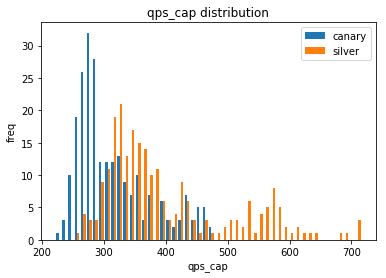

In [23]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)
cap = np.array(cap)
cap_silver = np.array(cap_silver)
plt.hist([cap, cap_silver], bins=50, label=['canary', 'silver'])

plt.title('qps_cap distribution')
plt.xlabel('qps_cap')
plt.ylabel('freq')
plt.legend()
plt.show()

In [16]:
(cap.mean(),math.sqrt(cap.var()), cap_silver.mean(),math.sqrt(cap_silver.var()))

(315.55191524525134,
 60.037861424568355,
 400.91016331534723,
 102.19127011066297)

  ### Chi Square Test
Determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

H0: Both distribution frequencies of Non-Silver and Silver are equals
H1: Samples form Silver and Non-Silver belongs to two diferent distributions

PD: try  Kolmogorov–Smirnov test 


In [17]:
from scipy import stats


dice = np.array([cap,cap_silver])
stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
chi2_stat, p_val, dof

(1329.1904268728633, 1.6600819058371214e-150, 239)

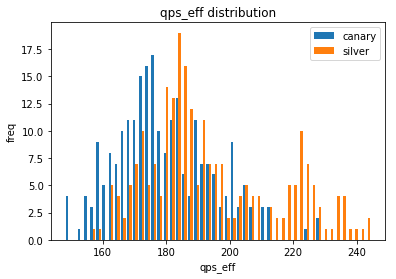

(179.6929410410242, 15.256508966985775, 194.17695273179433, 20.501476716939585)

In [21]:
eff = np.array(eff)
eff_silver = np.array(eff_silver)
plt.hist([eff, eff_silver], bins=50, label=['canary', 'silver'])

plt.title('qps_eff distribution')
plt.xlabel('qps_eff')
plt.ylabel('freq')
plt.legend()
plt.show()
(eff.mean(),math.sqrt(eff.var()), eff_silver.mean(),math.sqrt(eff_silver.var()))

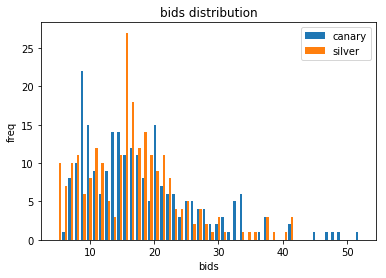

(18.03059677582162, 8.937732647936416, 16.65295369410147, 7.5656738780463435)

In [22]:
bids = np.array(bids)
bids_silver = np.array(bids_silver)
plt.hist([bids, bids_silver], bins=50, label=['canary', 'silver'])

plt.title('bids distribution')
plt.xlabel('bids')
plt.ylabel('freq')
plt.legend()
plt.show()
(bids.mean(),math.sqrt(bids.var()), bids_silver.mean(),math.sqrt(bids_silver.var()))